## Resumen del notebook

En este notebook se implementa una regresión logisitca para una clasficación binomial.

Para continuar analizando la variación del desempeño del modelo de clasificación binaria ante diferentes hiperparametros, este notebook hace un entrenamiento utilizando un dataset de mayor tamaño. Para utilizar un mayor npumero de imagenes de entrenamieto se hace un incremento de datos "Data Augmentation" en el cual se hace una rotacion a 45 y 90 grados de las imagenes, asi como una reflexoin vertical para tener un total de 17000 imagenes de entrenamiento y 7480 imagenes de test.

Al final del notebook se realiza una prueba del modelo entrenado con imagenes de lentes gravitacionales reales con forma de arco para analizar el desempeño ante imagenes reales. 
 

**Información del data set utilizado:**

No. Imagenes **sin** lentes para TRAIN: 8800

No. Imagenes **con** lentes para TRAIN: 8200


No. Imagenes **sin** lentes para TEST: 3200

No. Imagenes **con** lentes para TEST: 4200


**Principales hiperparametros de entrenamiento en este notebook:**

Tamaño en pixeles de las imagenes de entrenamiento: 128x128x3 

Alpha (learning rate): 0.005

Numero de iteraciones durante el entrenamiento: 2000

**Desempeño de este modelo ante imagenes reales de lentes gravitacionales:  MAL:** Realiza una mala clasificación en la mayoria de las imagenes reales. Se necesita mejorar el modelo en general y tratar de identificar por qué el rendimiento del modelo 

**Desempeño del modelo:**

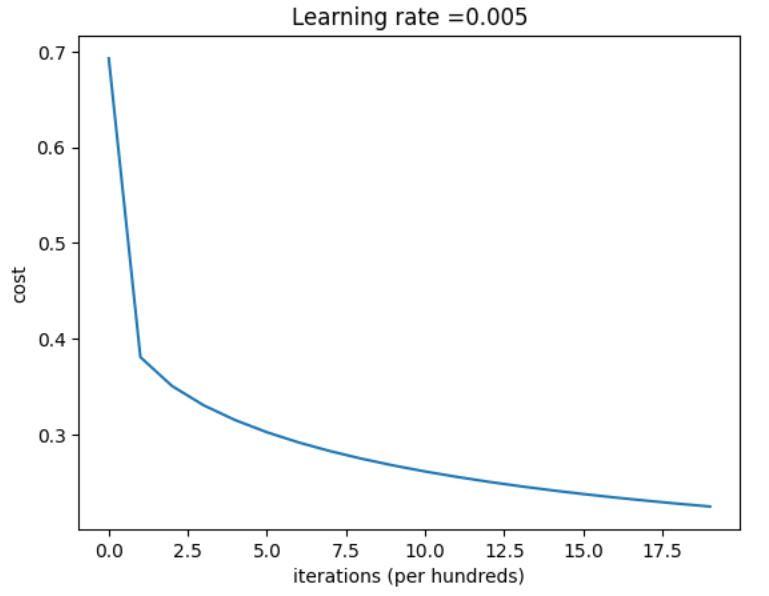

**Desempeño del modelo con diferentes valores de alpha (learning rate):**

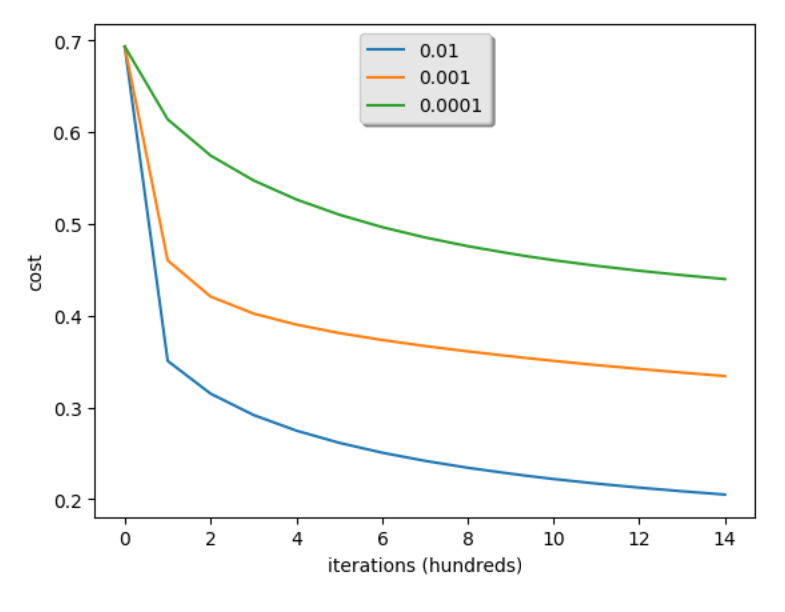

<a name='1'></a>
## Cargar librerias 

Primero cargamos las librerias necesarias para este notebook de clasificación binaria.

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#####
import tensorflow as tf
from astroNN.datasets import galaxy10
import sklearn
from sklearn.model_selection import train_test_split
#import scipy.ndimage
import cv2
from skimage.transform import PiecewiseAffineTransform, warp
from skimage import data
import os
from scipy import ndimage

2022-11-28 15:42:04.180254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-28 15:42:04.426208: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-28 15:42:04.426276: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-28 15:42:05.508504: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [3]:
def lente_imagen(image, amplitud, periodo, nombre): # apply a sin function on images

    rows, cols = image.shape[0], image.shape[1]

    src_cols = np.linspace(0, cols, 20)
    src_rows = np.linspace(0, rows, 10)
    src_rows, src_cols = np.meshgrid(src_rows, src_cols)
    src = np.dstack([src_cols.flat, src_rows.flat])[0]

    # add sinusoidal oscillation to row coordinates
    dst_rows = src[:, 1] - np.sin(np.linspace(0, periodo, src.shape[0])) * amplitud
    dst_cols = src[:, 0]
    #dst_rows *= 1.5
    #dst_rows -= 1.5 * 50
    dst = np.vstack([dst_cols, dst_rows]).T


    tform = PiecewiseAffineTransform()
    tform.estimate(src, dst)

    out_rows = image.shape[0] # - 1.5 * 50
    out_cols = cols
    out = warp(image, tform, output_shape=(out_rows, out_cols))

    fig, ax = plt.subplots()
    ax.imshow(out)
    #ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
    #ax.axis((0, out_cols, out_rows, 0))
    plt.rcParams ["figure.figsize"] = (5,5)
    
    plt.axis('off')
    plt.imshow(out)
    
    plt.savefig(nombre, bbox_inches='tight',pad_inches = 0, dpi=56.5)

In [4]:
images, labels = galaxy10.load_data()

/root/.astroNN/datasets/Galaxy10.h5 was found!


In [5]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']


In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17428, 69, 69, 3), (4357, 69, 69, 3), (17428,), (4357,))

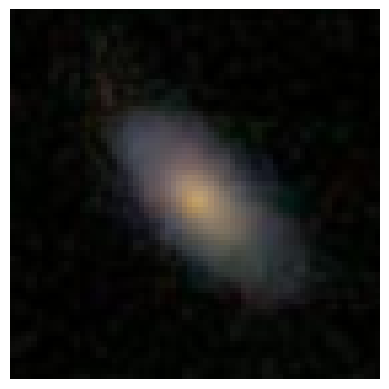

In [8]:
# guardar los datos de entrenamiento obtenidos desde x_train  de galaxy10
# for i in range(1400, 2200): #len(x_train)//2):
#     plt.axis('off')
#     plt.rcParams ["figure.figsize"] = (10,10)
#     plt.imshow(x_train[i])
#     name = str(features[y_train[i]])
#     images = f'/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/' + str(i) + '_' + name + '.png'
#     plt.savefig(images, bbox_inches='tight',pad_inches = 0, dpi=28.3)
    
    # aplicar lentes a las imagenes y guardarlas 
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_A_' + name + '.png'
#     lente_imagen(x_train[i], 60, 8, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_B_' + name + '.png'
#     lente_imagen(x_train[i], 40, 8, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_C_' + name + '.png'
#     lente_imagen(x_train[i], 20, 8, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_D_' + name + '.png'
#     lente_imagen(x_train[i], 60, 10, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_E_' + name + '.png'
#     lente_imagen(x_train[i], 40, 10, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_F_' + name + '.png'
#     lente_imagen(x_train[i], 20, 10, nombre1)    
    
    #plt.show()

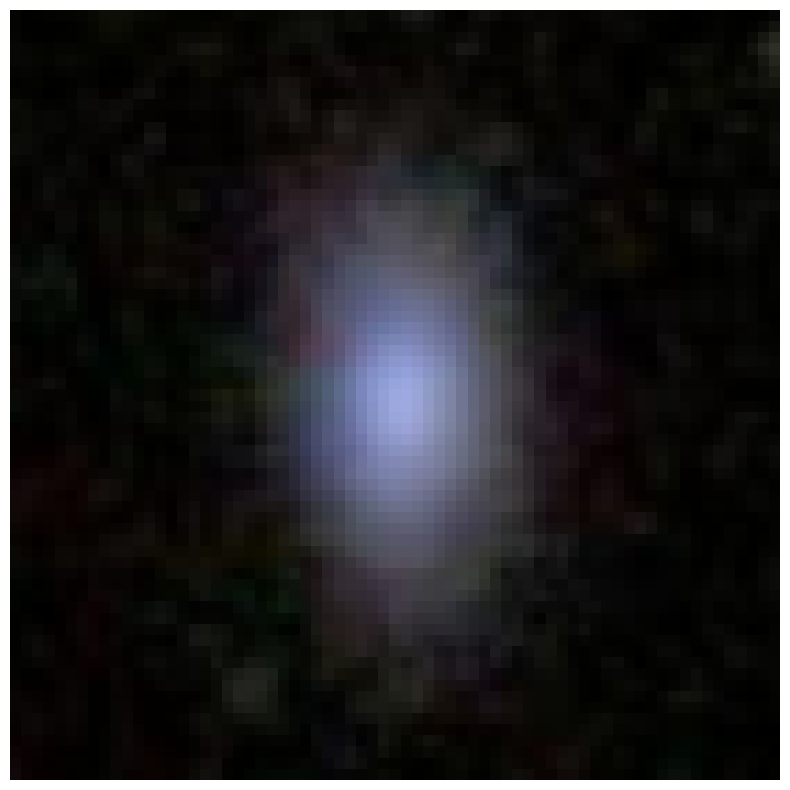

In [10]:
# guardar los datos de prueba obtenidos desde x_train  de galaxy10
# for i in range(1190, 1500): #len(x_test)//2):
#     plt.axis('off')
#     plt.imshow(x_test[i])
#     name = str(features[y_test[i]])
#     images = f'/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies/' + str(i) + '_' + name + '.png'
#     plt.savefig(images, bbox_inches='tight',pad_inches = 0, dpi=56.4)
    
#     #aplicar lentes a las imagenes y guardarlas 
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_A_' + name + '.png'
#     lente_imagen(x_test[i], 55, 7, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_B_' + name + '.png'
#     lente_imagen(x_test[i], 35, 7, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_C_' + name + '.png'
#     lente_imagen(x_test[i], 15, 7, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_D_' + name + '.png'
#     lente_imagen(x_test[i], 55, 11, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_E_' + name + '.png'
#     lente_imagen(x_test[i], 35, 11, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_F_' + name + '.png'
#     lente_imagen(x_test[i], 15, 11, nombre1)       
    
    #plt.show()

In [91]:
# funcion para incrementar el numero de imagenes al aplicar rotaciones y mirrors
def augmentData(basepath):
    print(basepath)
    i = 0
    with os.scandir(basepath) as entries:
        for entry in entries:
            if entry.is_file():
                #print(str(entry.name))
                print(i, end="\r")
                if(i > 2400):
                    name = basepath + str(entry.name)
                    image = cv2.imread(name)
                    
                    image_90 = ndimage.rotate(image, -90)
                    name90 = basepath + str(entry.name) + str('rot_90.jpg')
                    image_45 = ndimage.rotate(image, -45)
                    name45 = basepath + str(entry.name) + str('rot_45.jpg')
                    image_flip1 = cv2.flip(image, 1)
                    nameflip1 = basepath + str(entry.name) + str('flip_1.jpg')
                    #image_flip0 = cv2.flip(image, 0) 
                    #nameflip0 = basepath + str(entry.name) + str('flip_0.jpg')
                
                    plt.axis('off')
                    plt.imshow(image_90)
                    plt.savefig(name90, bbox_inches='tight',pad_inches = 0, dpi=28.3)
                    plt.imshow(image_45)
                    plt.savefig(name45, bbox_inches='tight',pad_inches = 0, dpi=28.3)
                    
                    plt.imshow(image_flip1)
                    plt.savefig(nameflip1, bbox_inches='tight',pad_inches = 0, dpi=28.3)
                    #plt.imshow(image_flip0)
                    #plt.savefig(nameflip0, bbox_inches='tight',pad_inches = 0, dpi=28.3)
            i = i+1
            
# 24-11-2022 LA CARPETA /test_galaxies SOLO HIZO HASTA EL OBJETO 1220 / 500
# 24-11-2022 LA CARPETA /test_galaxies_lens SOLO HIZO HASTA EL OBJETO 903 / 1500
# 24-11-2022 LA CARPETA /train_galaxies SOLO HIZO HASTA EL OBJETO 2139 / 2500
# 24-11-2022 LA CARPETA /train_galaxies_lens SOLO HIZO HASTA EL OBJETO 1151 / 2500

/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst/
/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst_lens/


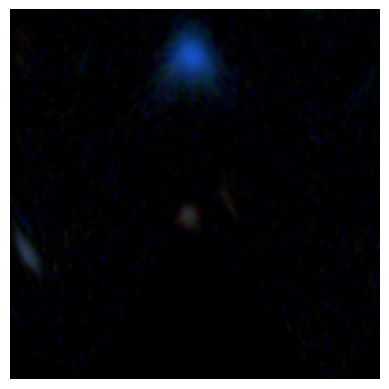

In [82]:
basepath1 = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies/' 
basepath2 = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies_lens/' 
basepath3 = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies_lsst/'

basepath4 = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/' 
basepath5 = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lens/' 
basepath6 = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst/' 
basepath7 = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst_2/' 
basepath8 = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst_lens/' 


# augmentData(basepath1) #ya
# augmentData(basepath2) #ya
# augmentData(basepath3) #ya
# augmentData(basepath4) #ya
# augmentData(basepath5) #ya
# augmentData(basepath6) #ya
# augmentData(basepath7) #ya
# augmentData(basepath8) #ya


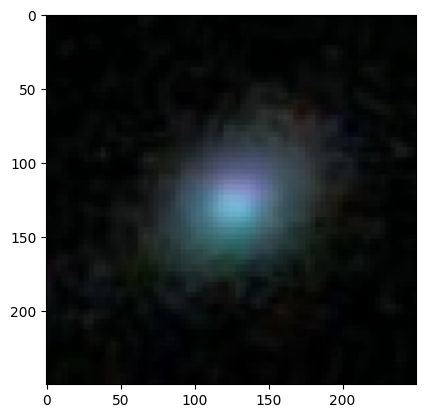

In [106]:
image1 = cv2.imread('/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/0_Smooth, in-between round.png')#.resize((250, 250))
image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA) 
plt.imshow(image1)
plt.show()


In [7]:
#tamaño de pixeles al que serán ajustadas las imagenes de entrenamiento y prueba
n_pixeles=128
dim = (n_pixeles, n_pixeles)

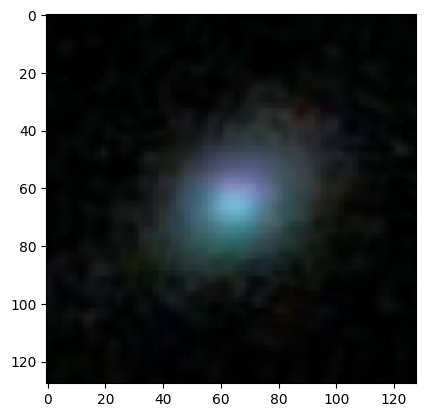

In [8]:
# Crear un solo arreglo de todas las imagenes dentro de las carpeta TRAIN
image1 = cv2.imread('/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/0_Smooth, in-between round.png')
image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA) 
image2 = cv2.imread('/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/1000.png')
image2 = cv2.resize(image2, dim, interpolation = cv2.INTER_AREA) 


train_set_x_orig_2 = np.append(image1 , image1)
train_set_x_orig_2.shape

basepath = '/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/'

i = 0
with os.scandir(basepath) as entries:
    for entry in entries:
        if entry.is_file():
            #print(str(entry.name))
            if(i > 1):
                name = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/' + str(entry.name)
                image1 = cv2.imread(name)
                image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA) 
                imaget = train_set_x_orig_2
                train_set_x_orig_2 = np.append(imaget , image1)
        i = i+1

basepath2 = '/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lens/'
        
with os.scandir(basepath2) as entries:
    for entry in entries:
        if entry.is_file():
            #print(str(entry.name))
            name = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lens/' + str(entry.name)
            image1 = cv2.imread(name)
            image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA) 
            imaget = train_set_x_orig_2
            train_set_x_orig_2 = np.append(imaget , image1)
      

p2 = train_set_x_orig_2.shape[0]/(n_pixeles*n_pixeles*3) 
r2 = int(p2)
plt.imshow(train_set_x_orig_2.reshape(r2, n_pixeles, n_pixeles, 3)[0])

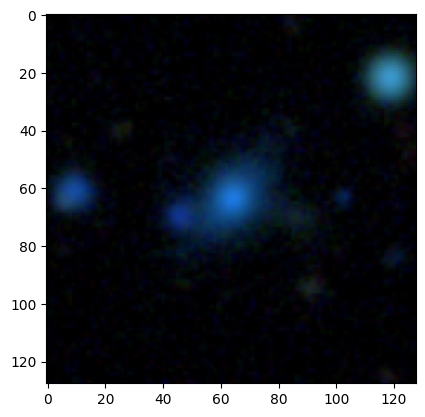

In [9]:
# Crear un solo arreglo de todas las imagenes dentro de las carpeta TEST
image1 = cv2.imread('/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies/0.png')
image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA) 
image2 = cv2.imread('/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies/0_Smooth, in-between round.png')
image2 = cv2.resize(image2, dim, interpolation = cv2.INTER_AREA) 

test_set_x_orig_2 = np.append(image1 , image1)
test_set_x_orig_2.shape

basepath = '/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies/'

i = 0
with os.scandir(basepath) as entries:
    for entry in entries:
        if entry.is_file():
            #print(str(entry.name))
            if(i > 1):
                name = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies/' + str(entry.name)
                image1 = cv2.imread(name)
                image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA) 
                imaget = test_set_x_orig_2
                test_set_x_orig_2 = np.append(imaget , image1)
        i = i+1   
        
basepath2 = '/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies_lens/'
        
with os.scandir(basepath2) as entries:
    for entry in entries:
        if entry.is_file():
            #print(str(entry.name))
            name = f'/root/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies_lens/' + str(entry.name)
            image1 = cv2.imread(name)
            image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA) 
            imaget = test_set_x_orig_2
            test_set_x_orig_2 = np.append(imaget , image1)
        
p = test_set_x_orig_2.shape[0]/(n_pixeles*n_pixeles*3) 
r = int(p)
plt.imshow(test_set_x_orig_2.reshape(r, n_pixeles, n_pixeles, 3)[1])

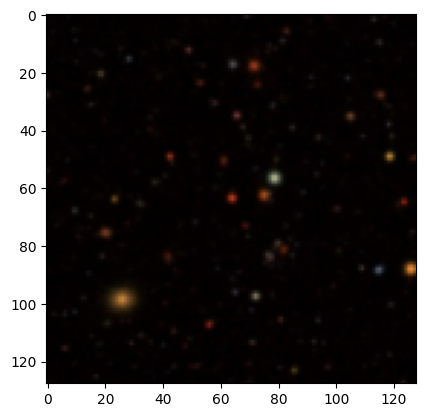

In [10]:
plt.imshow(train_set_x_orig_2.reshape(r2, n_pixeles, n_pixeles, 3)[10])

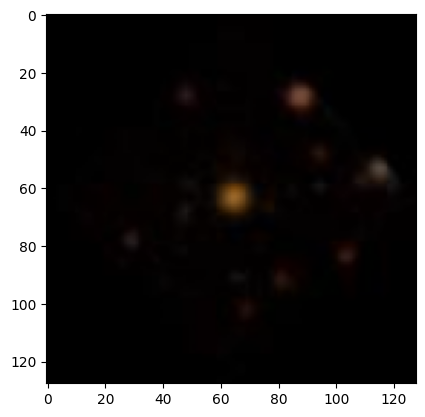

In [11]:
plt.imshow(test_set_x_orig_2.reshape(r, n_pixeles, n_pixeles, 3)[10])

In [12]:
train = train_set_x_orig_2.reshape(r2, n_pixeles, n_pixeles, 3)
train.shape

(17045, 128, 128, 3)

In [13]:
# para train
d1=8811 # sin lentes
d2=8233 #con lentes

hola = np.zeros((1, d1 + 1)) 
bye = np.zeros((1, d2)) + 1
c = np.append(hola, bye)
c_train = c.reshape(1, d1+d2 +1)
c_train.shape

(1, 17045)

In [14]:
test = test_set_x_orig_2.reshape(r, n_pixeles, n_pixeles, 3)
test.shape

(7478, 128, 128, 3)

In [15]:
# para test
d1=3272 #sin lentes
d2=4206 #con lentes

hola = np.zeros((1, d1))
bye = np.zeros((1, d2)) + 1
c = np.append(hola, bye)
c_test = c.reshape(1, d1+d2)
c_test.shape

(1, 7478)

<a name='2'></a>
## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [16]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [17]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [18]:
# Loading the data (LENS / NO_LENS)
classes2 = classes
classes2[0] = b'NO_LENS'
classes2[1] = b'LENS'


train_set_x_orig = train
train_set_y = c_train
test_set_x_orig = test
test_set_y = c_test
classes = classes2

In [19]:
classes

array([b'NO_LENS', b'LENS'], dtype='|S7')

In [20]:
classes[np.squeeze(train_set_y[:, 0].astype(int))].decode("utf-8")

'NO_LENS'

y = [0.], it's a 'NO_LENS' picture.


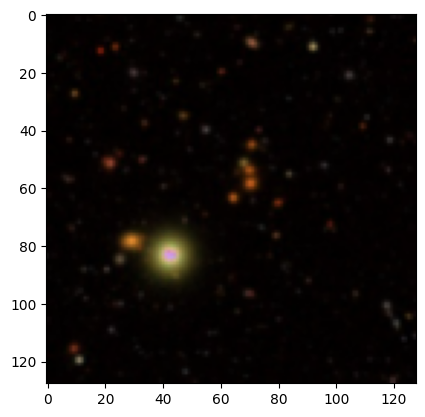

In [21]:
# Example of a picture from TRAIN SET
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index].astype(int))].decode("utf-8") +  "' picture.")

y = [0.], it's a 'NO_LENS' picture.


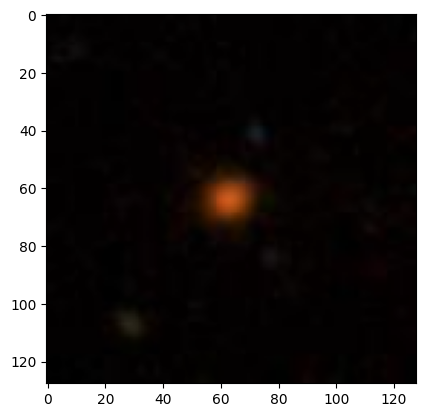

In [22]:
# Example of a picture from TEST SET
index = 5
plt.imshow(test_set_x_orig[index])
print ("y = " + str(test_set_y[:, index]) + ", it's a '" + classes[np.squeeze(test_set_y[:, index].astype(int))].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

<a name='ex-1'></a>
### Exercise 1
Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [23]:
#(≈ 3 lines of code)
# m_train = 
# m_test = 
# num_px = 
# YOUR CODE STARTS HERE
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = len(train_set_x_orig[0])
# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 17045
Number of testing examples: m_test = 7478
Height/Width of each image: num_px = 128
Each image is of size: (128, 128, 3)
train_set_x shape: (17045, 128, 128, 3)
train_set_y shape: (1, 17045)
test_set_x shape: (7478, 128, 128, 3)
test_set_y shape: (1, 7478)


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td> m_train </td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

<a name='ex-2'></a>
### Exercise 2
Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [24]:
# Reshape the training and test examples
#(≈ 2 lines of code)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# YOUR CODE STARTS HERE
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
# YOUR CODE ENDS HERE

# Check that the first 10 pixels of the second image are in the correct place
#assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
#assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (49152, 17045)
train_set_y shape: (1, 17045)
test_set_x_flatten shape: (49152, 7478)
test_set_y shape: (1, 7478)


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

In [25]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<a name='4'></a>
## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

<a name='4-1'></a>
### 4.1 - Helper functions

<a name='ex-3'></a>
### Exercise 3 - sigmoid
Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp().

<font color='blue'>
    
    
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

<a name='3'></a>
## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

In [26]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s = 1 / (1+np.exp(-z))
    # YOUR CODE ENDS HERE
    
    return s

In [27]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

sigmoid([0, 2]) = [0.5        0.88079708]
All tests passed!


In [28]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


<a name='4-2'></a>
### 4.2 - Initializing parameters

<a name='ex-4'></a>
### Exercise 4 - initialize_with_zeros
Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [29]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros([dim, 1])
    b = 0.0
    # YOUR CODE ENDS HERE

    return w, b

In [30]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)


w = [[0.]
 [0.]]
b = 0.0
First test passed!
Second test passed!


<a name='4-3'></a>
### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

<a name='ex-5'></a>
### Exercise 5 - propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [31]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    A = sigmoid( np.dot(w.T, X) + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [32]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
All tests passed!


**Expected output**

```
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
```

<a name='4-4'></a>
### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

<a name='ex-6'></a>
### Exercise 6 - optimize
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [33]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w = w - learning_rate * dw
        b = b - learning_rate * db
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [34]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]
All tests passed!


<a name='ex-7'></a>
### Exercise 7 - predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [35]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid( np.dot(w.T, X) + b)
    # YOUR CODE ENDS HERE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        if A[0,i]>0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        # YOUR CODE ENDS HERE
    
    return Y_prediction

In [36]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

predictions = [[1. 1. 0.]]
All tests passed!


<font color='blue'>
    
**What to remember:**
    
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - Computing the cost and its gradient 
    - Updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

<a name='5'></a>
## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

<a name='ex-8'></a>
### Exercise 8 - model
Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [37]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=True):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)   
    # initialize parameters with zeros 
    # w, b = ...
    
    #(≈ 1 line of code)
    # Gradient descent 
    # params, grads, costs = ...
    
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    
    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # YOUR CODE STARTS HERE
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [38]:
from public_tests import *

model_test(model)

Cost after iteration 0: 0.693147
train accuracy: 85.71428571428572 %
test accuracy: 66.66666666666667 %
All tests passed!


If you pass all the tests, run the following cell to train your model.

In [39]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.380857
Cost after iteration 200: 0.350673
Cost after iteration 300: 0.330515
Cost after iteration 400: 0.314987
Cost after iteration 500: 0.302346
Cost after iteration 600: 0.291722
Cost after iteration 700: 0.282599
Cost after iteration 800: 0.274640
Cost after iteration 900: 0.267612
Cost after iteration 1000: 0.261344
Cost after iteration 1100: 0.255708
Cost after iteration 1200: 0.250604
Cost after iteration 1300: 0.245954
Cost after iteration 1400: 0.241695
Cost after iteration 1500: 0.237776
Cost after iteration 1600: 0.234155
Cost after iteration 1700: 0.230795
Cost after iteration 1800: 0.227668
Cost after iteration 1900: 0.224748
train accuracy: 91.80404810794954 %
test accuracy: 81.41214228403317 %


**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test accuracy is 70%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

y = 0.0, you predicted that it is a "NO_LENS" picture.


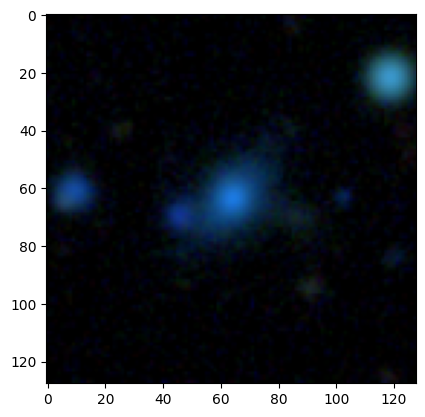

In [40]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

Let's also plot the cost function and the gradients.

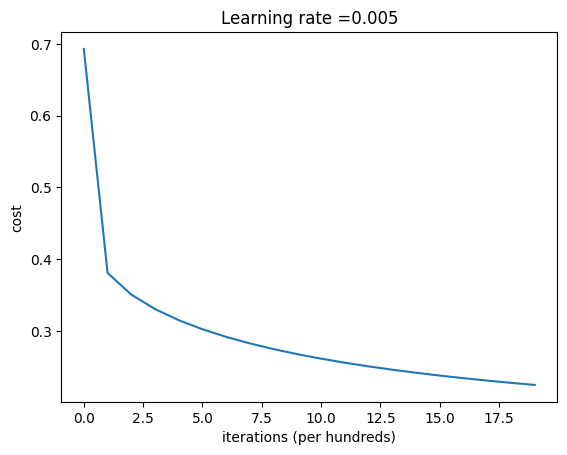

In [41]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

<a name='6'></a>
## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



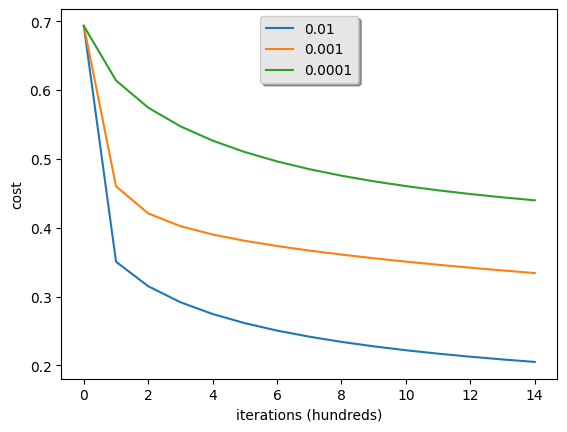

In [42]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.) 


<a name='7'></a>
## 7 - Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

In [43]:
# We preprocess the image to fit your algorithm.
def predecir(my_image): 
    fname = "images/" + my_image
    image = np.array(Image.open(fname).resize((num_px, num_px)))
    plt.imshow(image)
    image = image / 255.
    image = image.reshape((1, num_px * num_px * 3)).T
    my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)
    print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 1.0, your algorithm predicts a "LENS" picture.


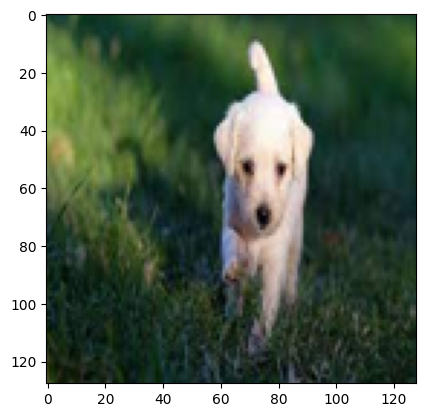

In [44]:
# change this to the name of your image file
my_image = "gato_no_1.jpg"   
predecir(my_image)

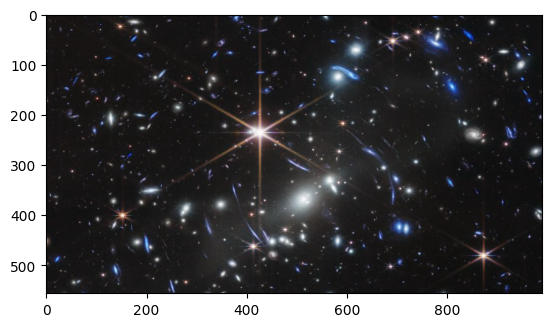

In [45]:
image = cv2.imread('images/smacs.jpeg')
plt.imshow(image)
plt.rcParams ["figure.figsize"] = (15,15)
plt.show()

y = 0.0, your algorithm predicts a "NO_LENS" picture.


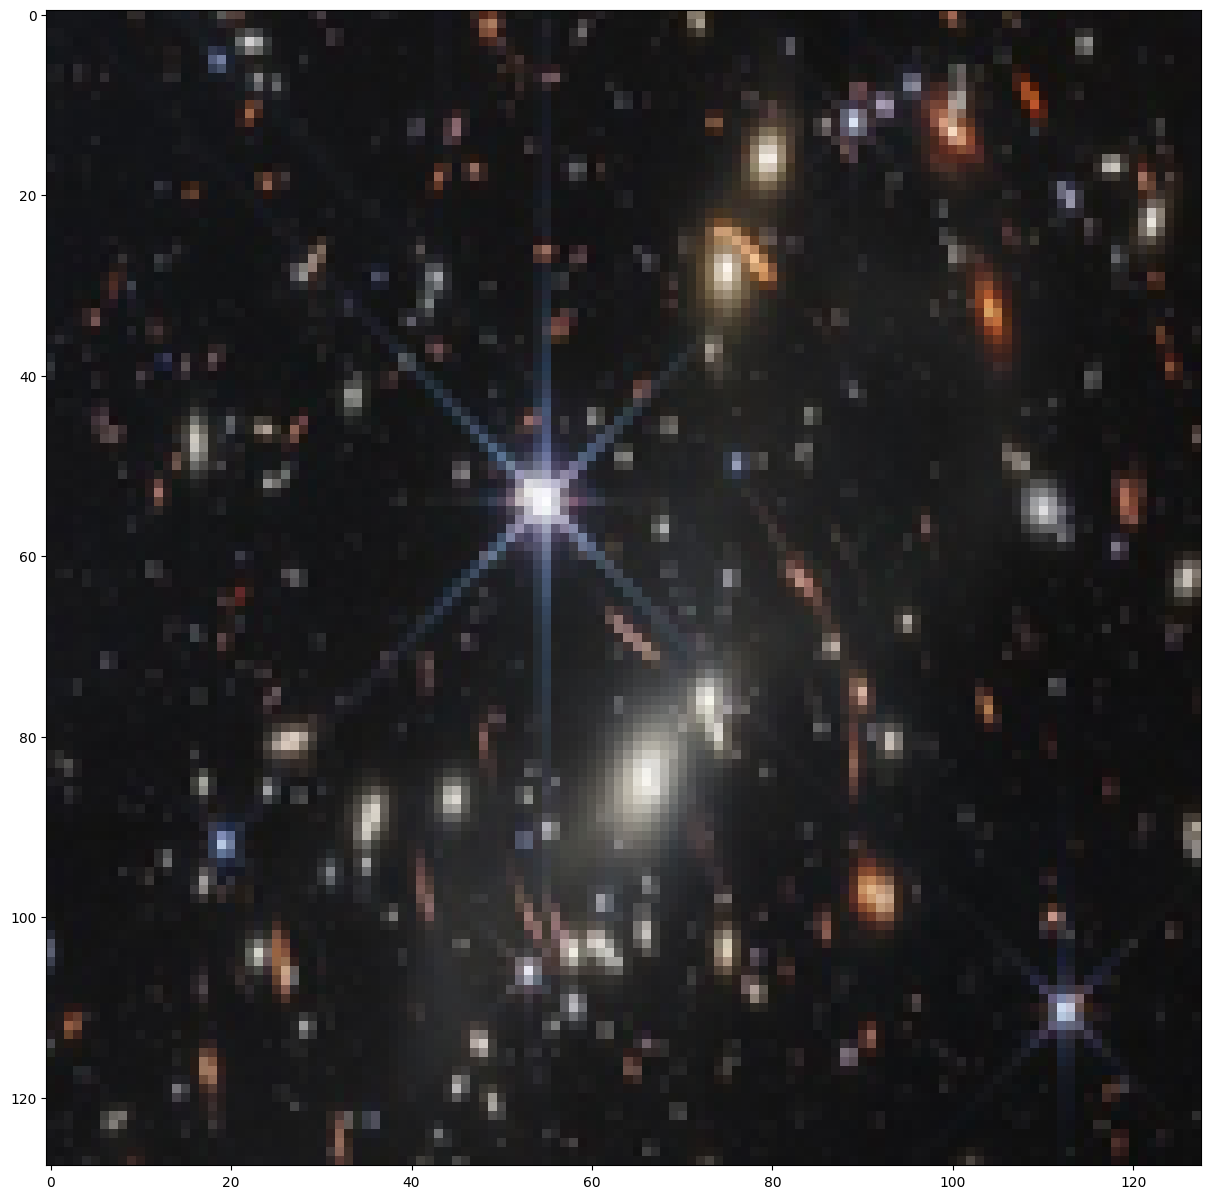

In [46]:
my_image = "smacs0723.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


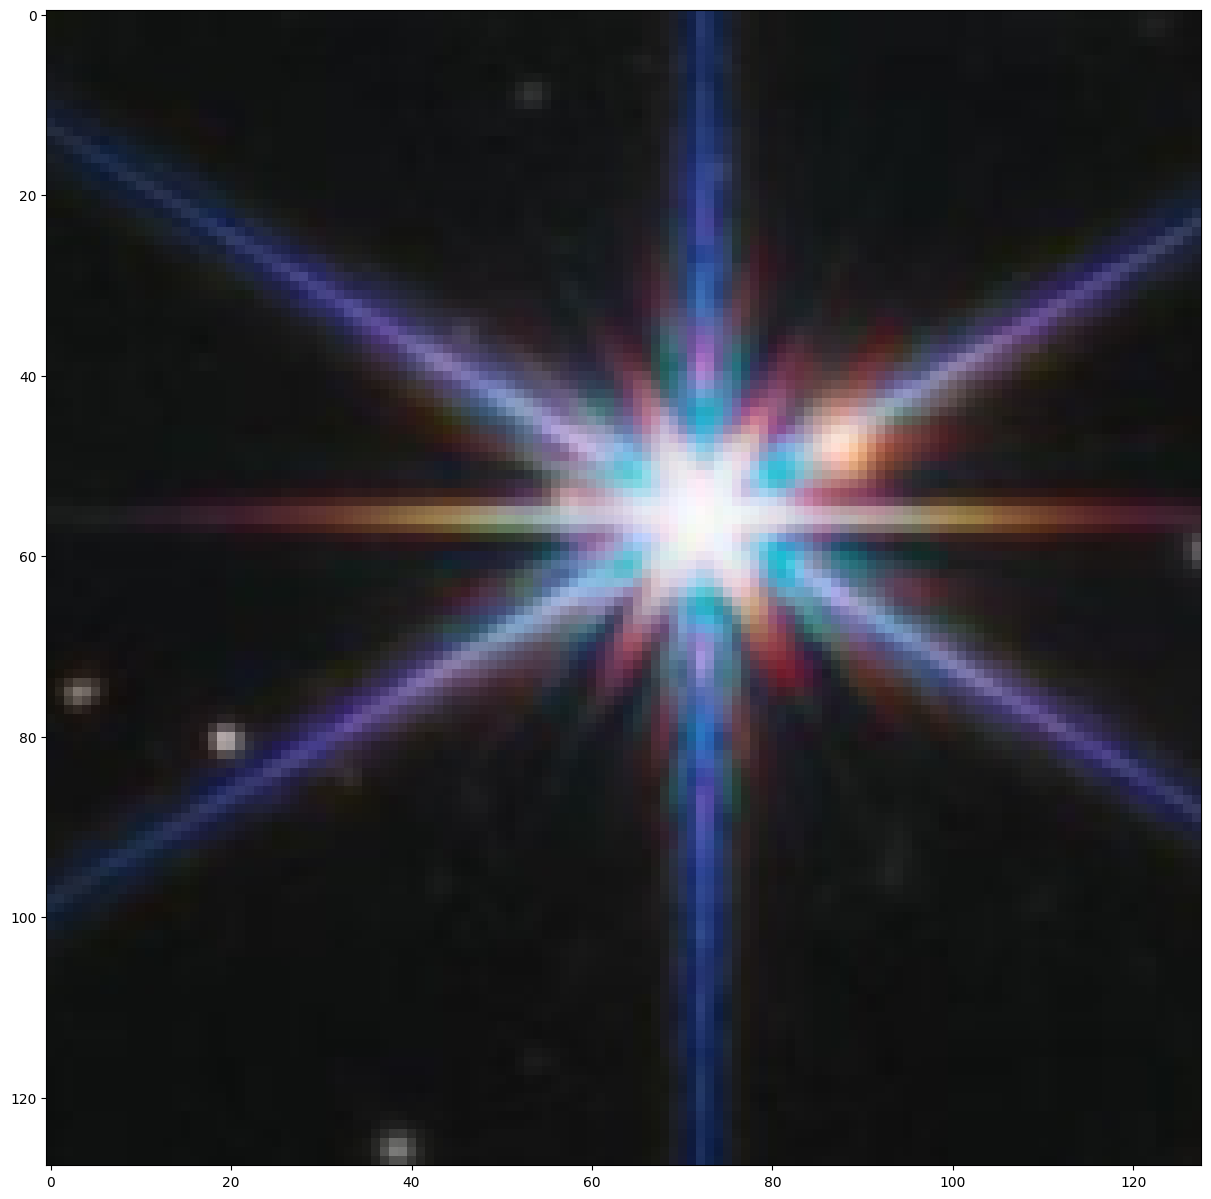

In [47]:
my_image = "lente_no_1.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


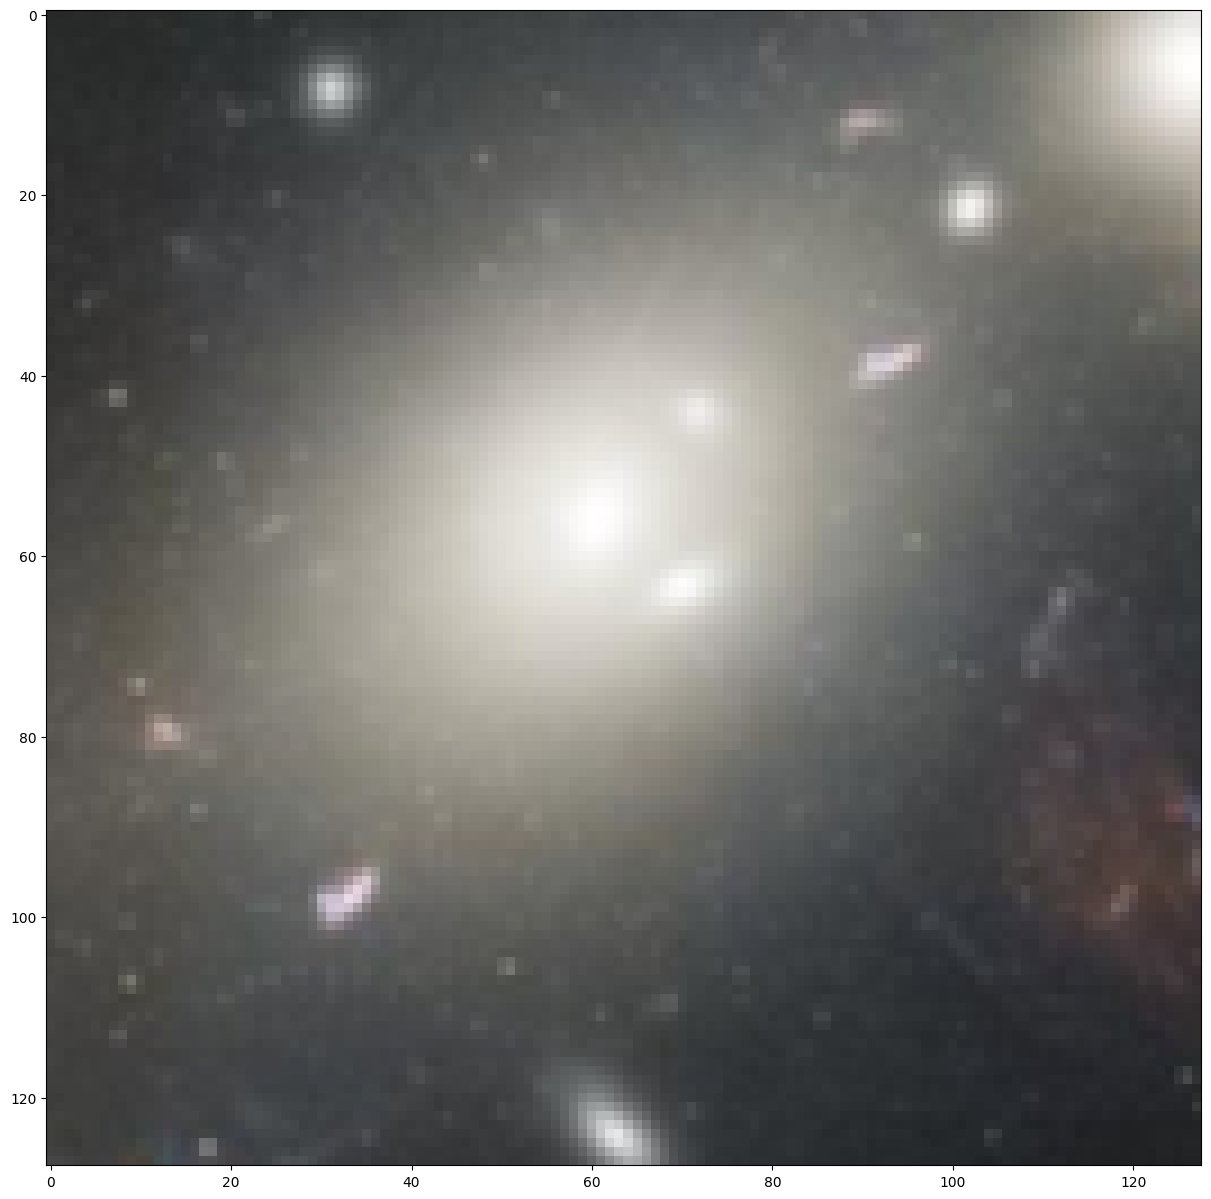

In [48]:
my_image = "lente_no_2.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


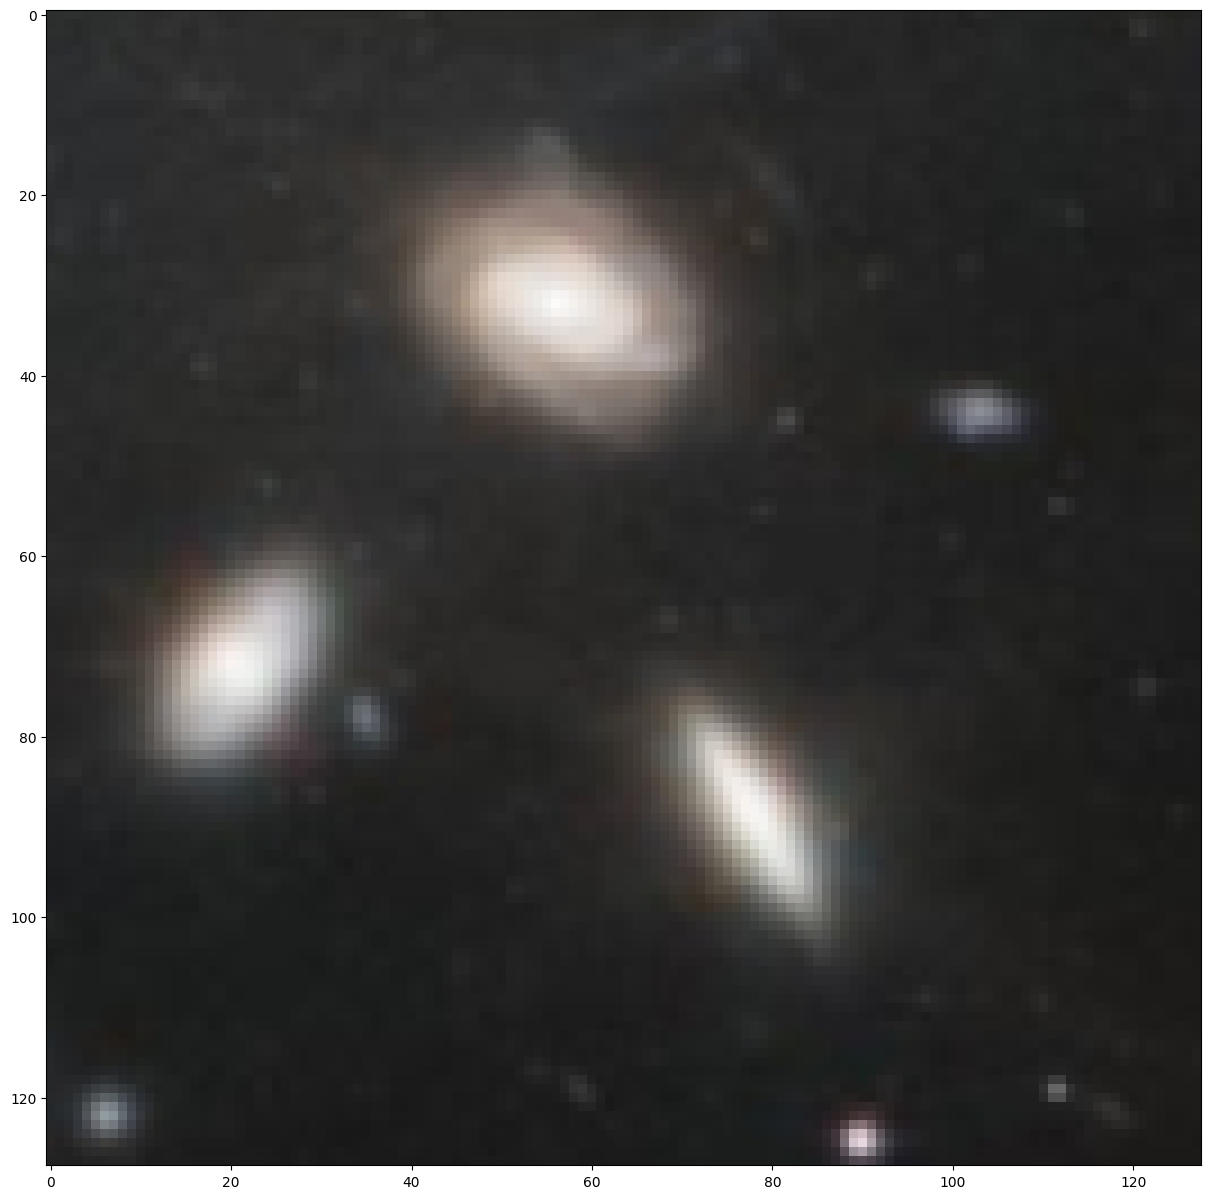

In [49]:
my_image = "lente_no_3.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


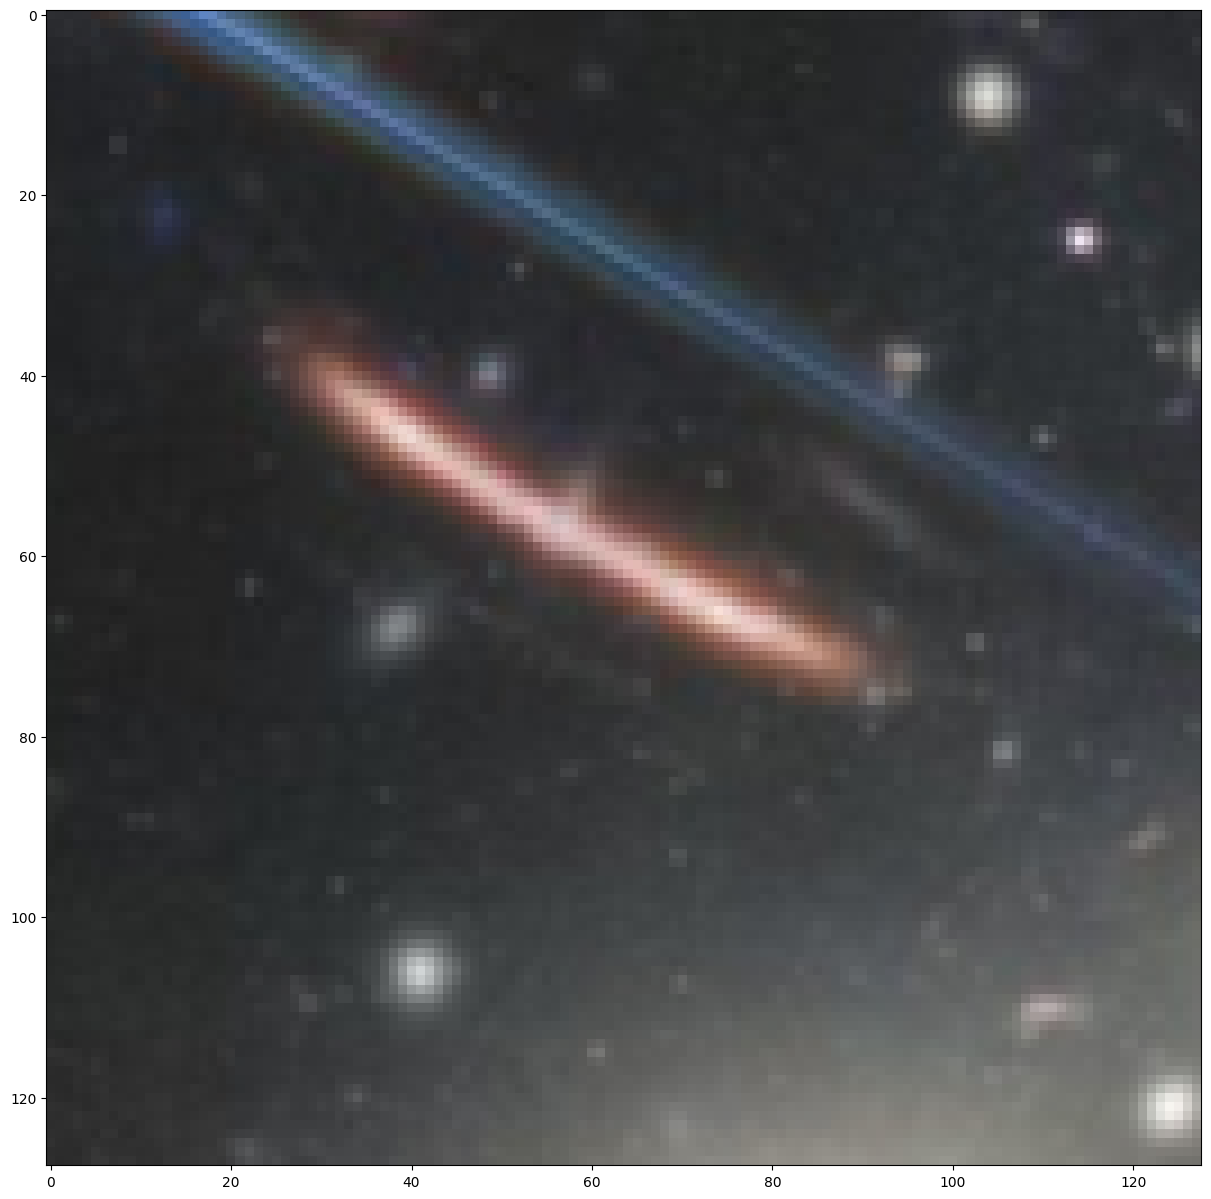

In [50]:
my_image = "lente_no_4.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


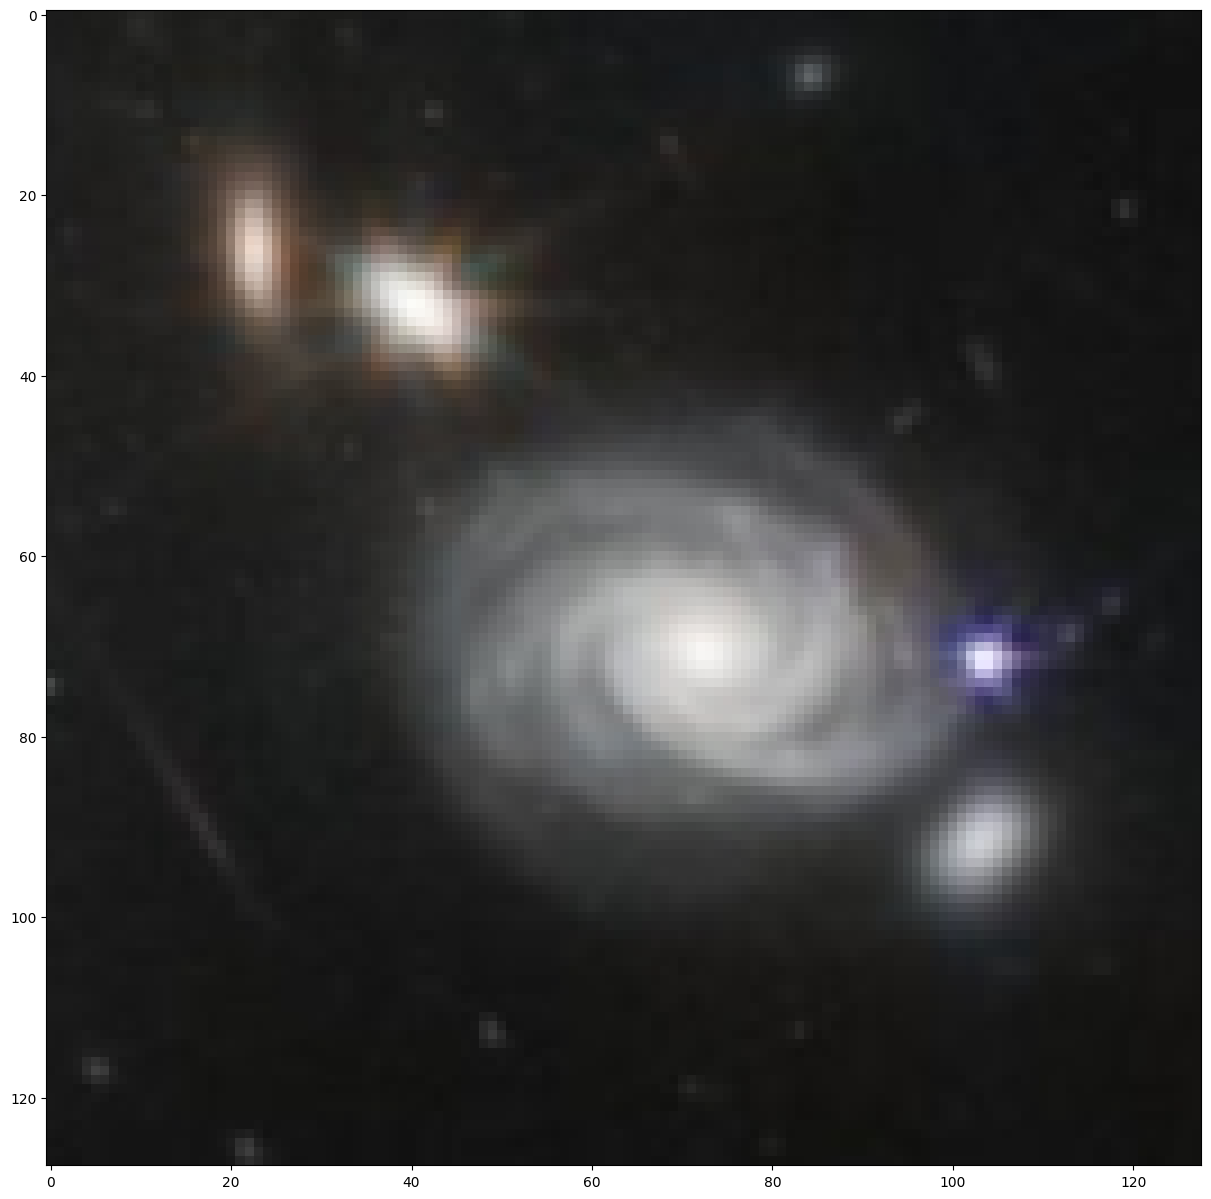

In [51]:
my_image = "lente_no_5.jpg"   
predecir(my_image)

y = 1.0, your algorithm predicts a "LENS" picture.


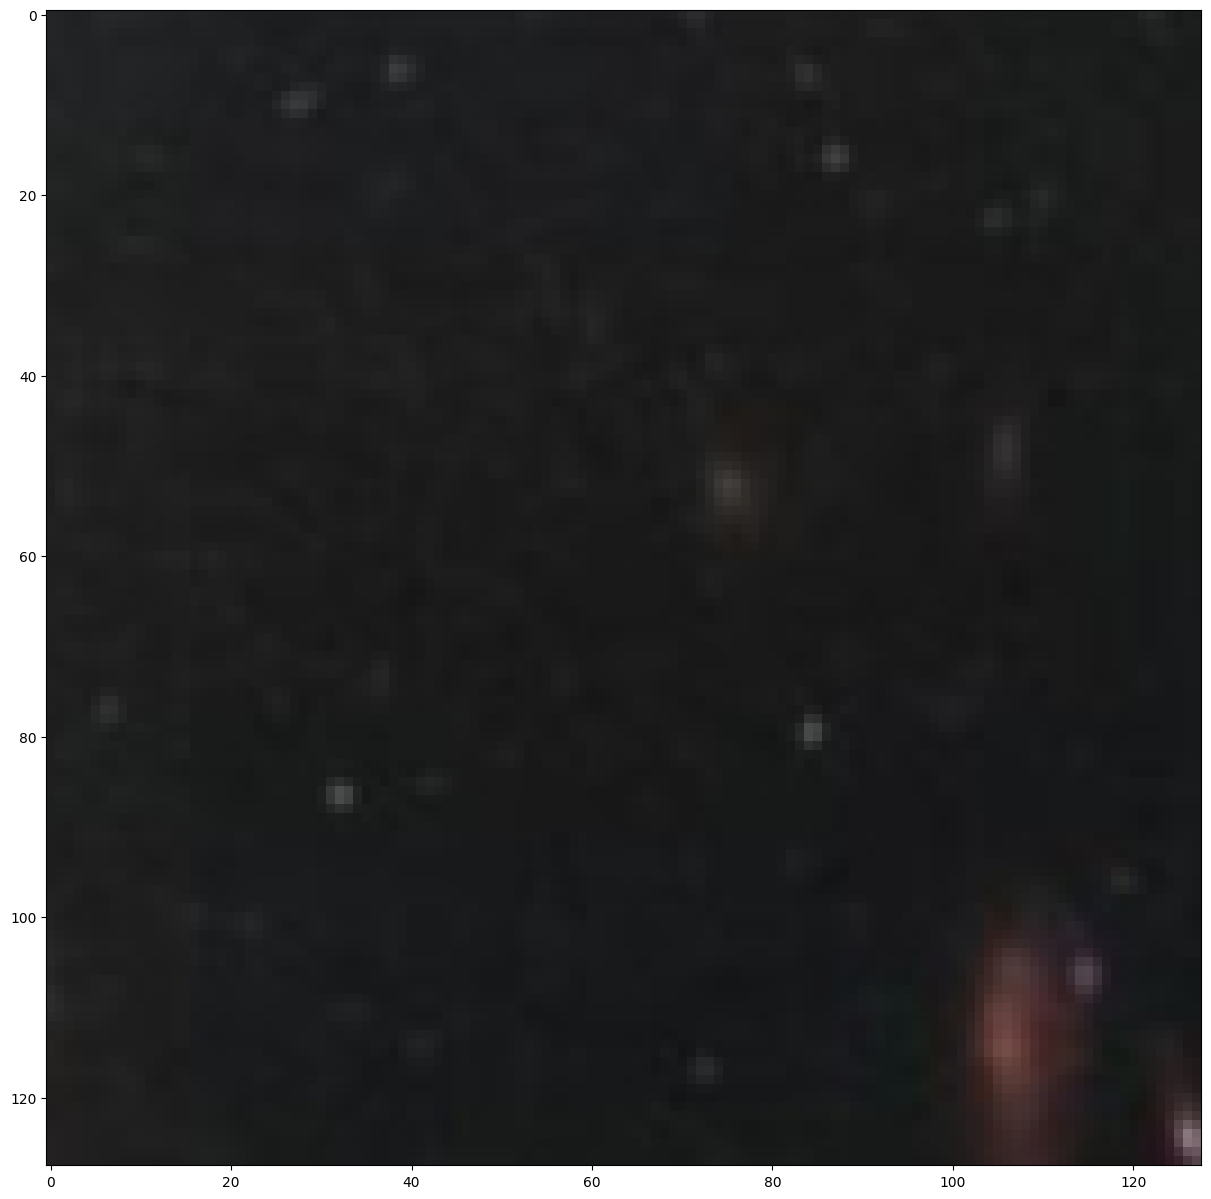

In [52]:
my_image = "lente_sino_1.jpg"   
predecir(my_image)

y = 1.0, your algorithm predicts a "LENS" picture.


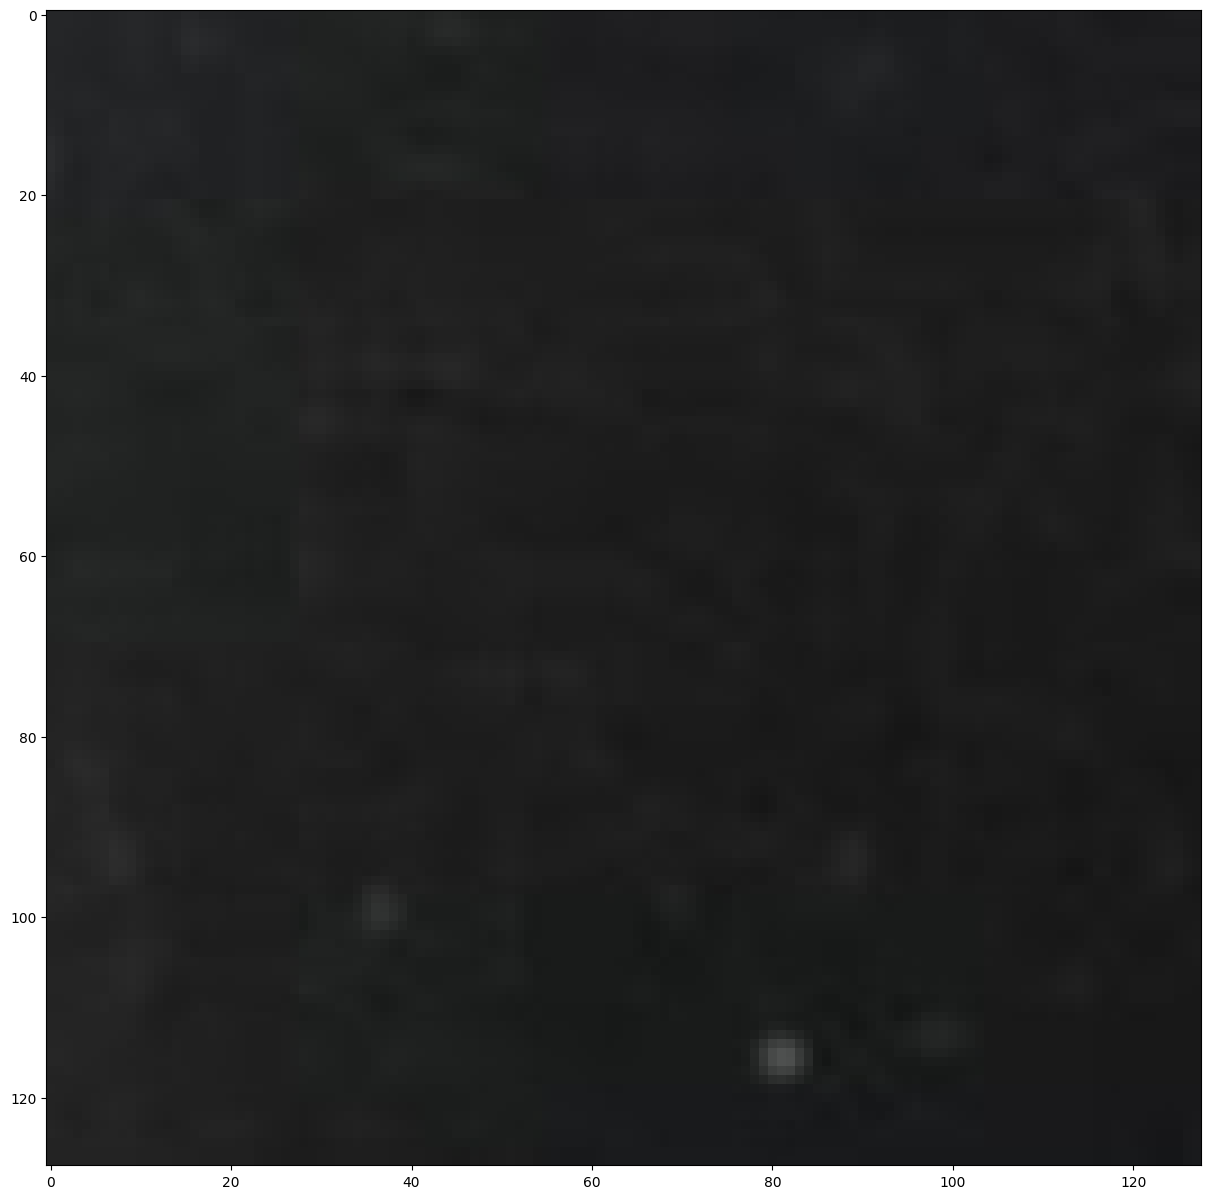

In [53]:
my_image = "lente_sino_2.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


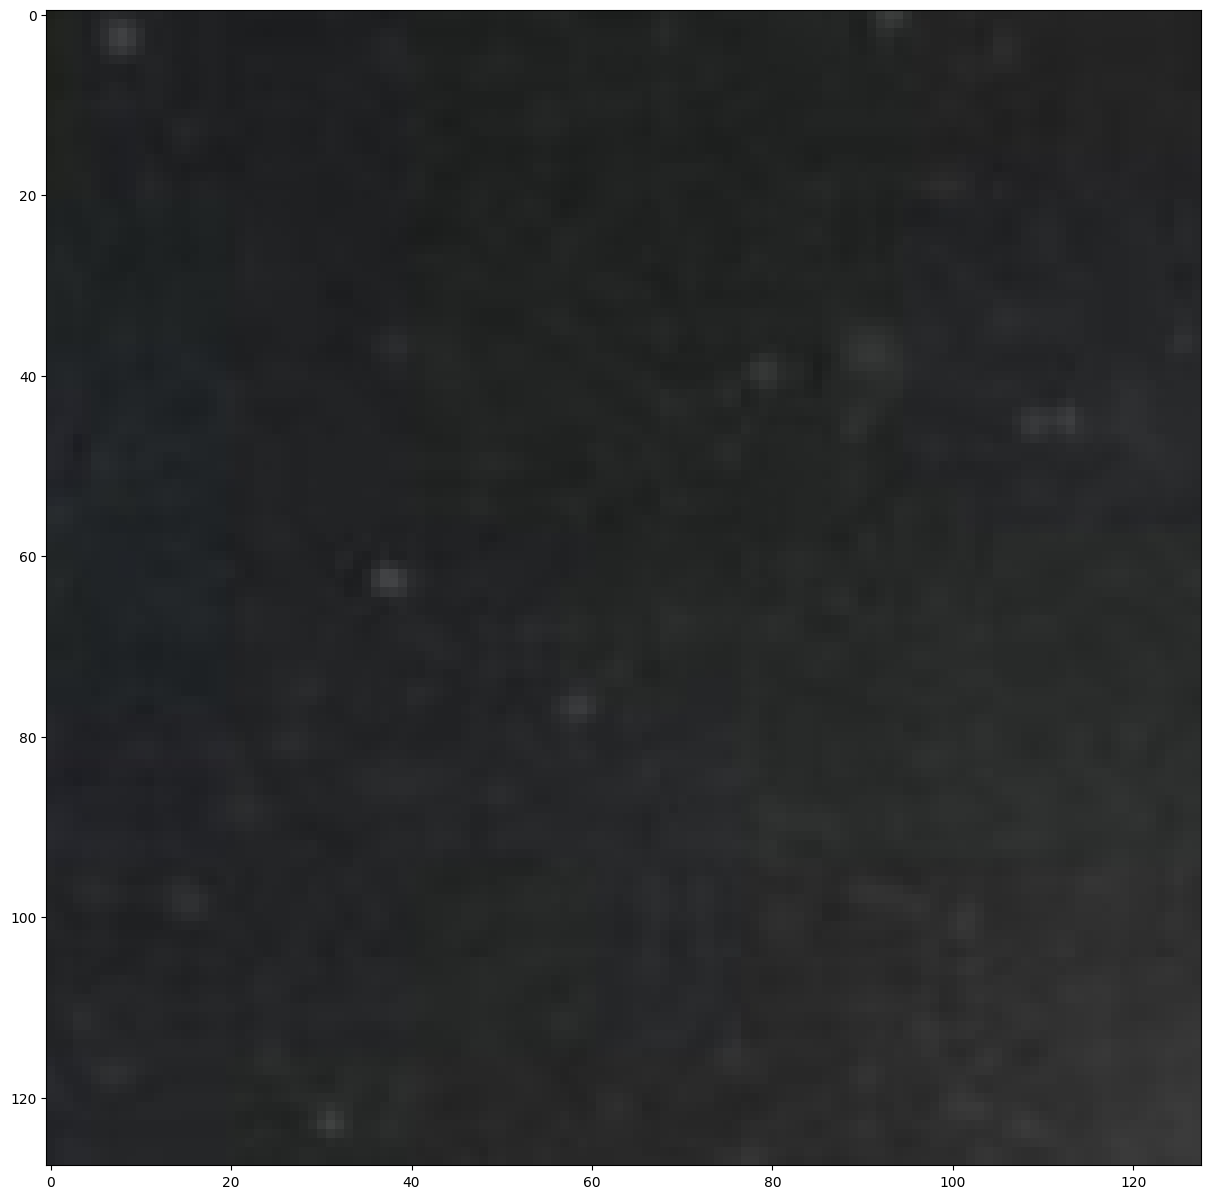

In [54]:
my_image = "lente_sino_3.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


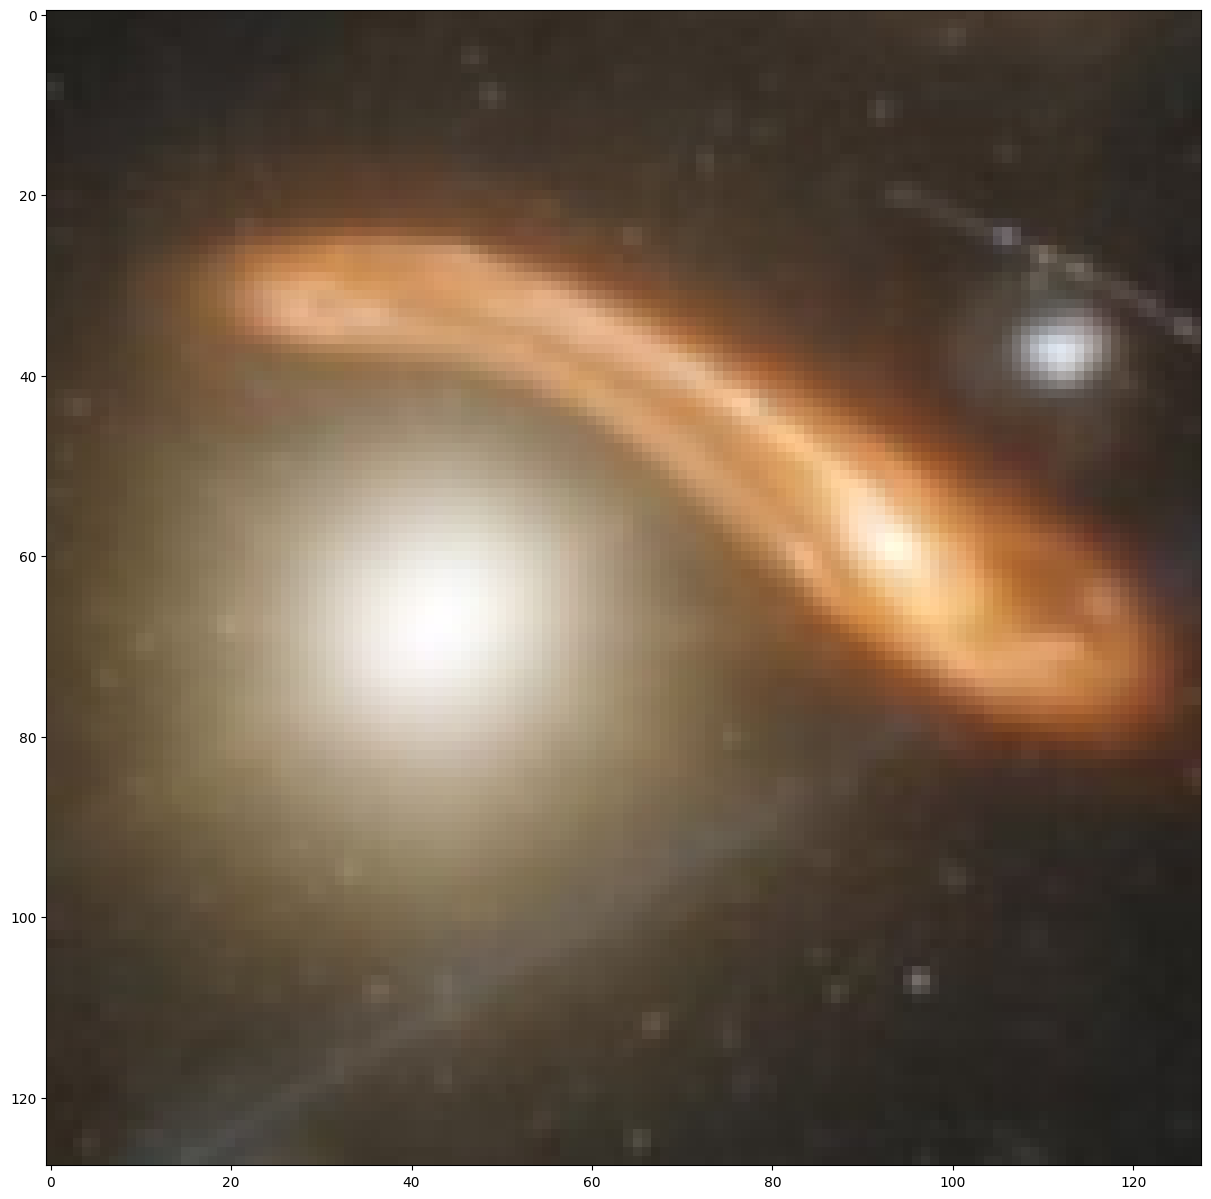

In [55]:
my_image = "lente_si_1.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


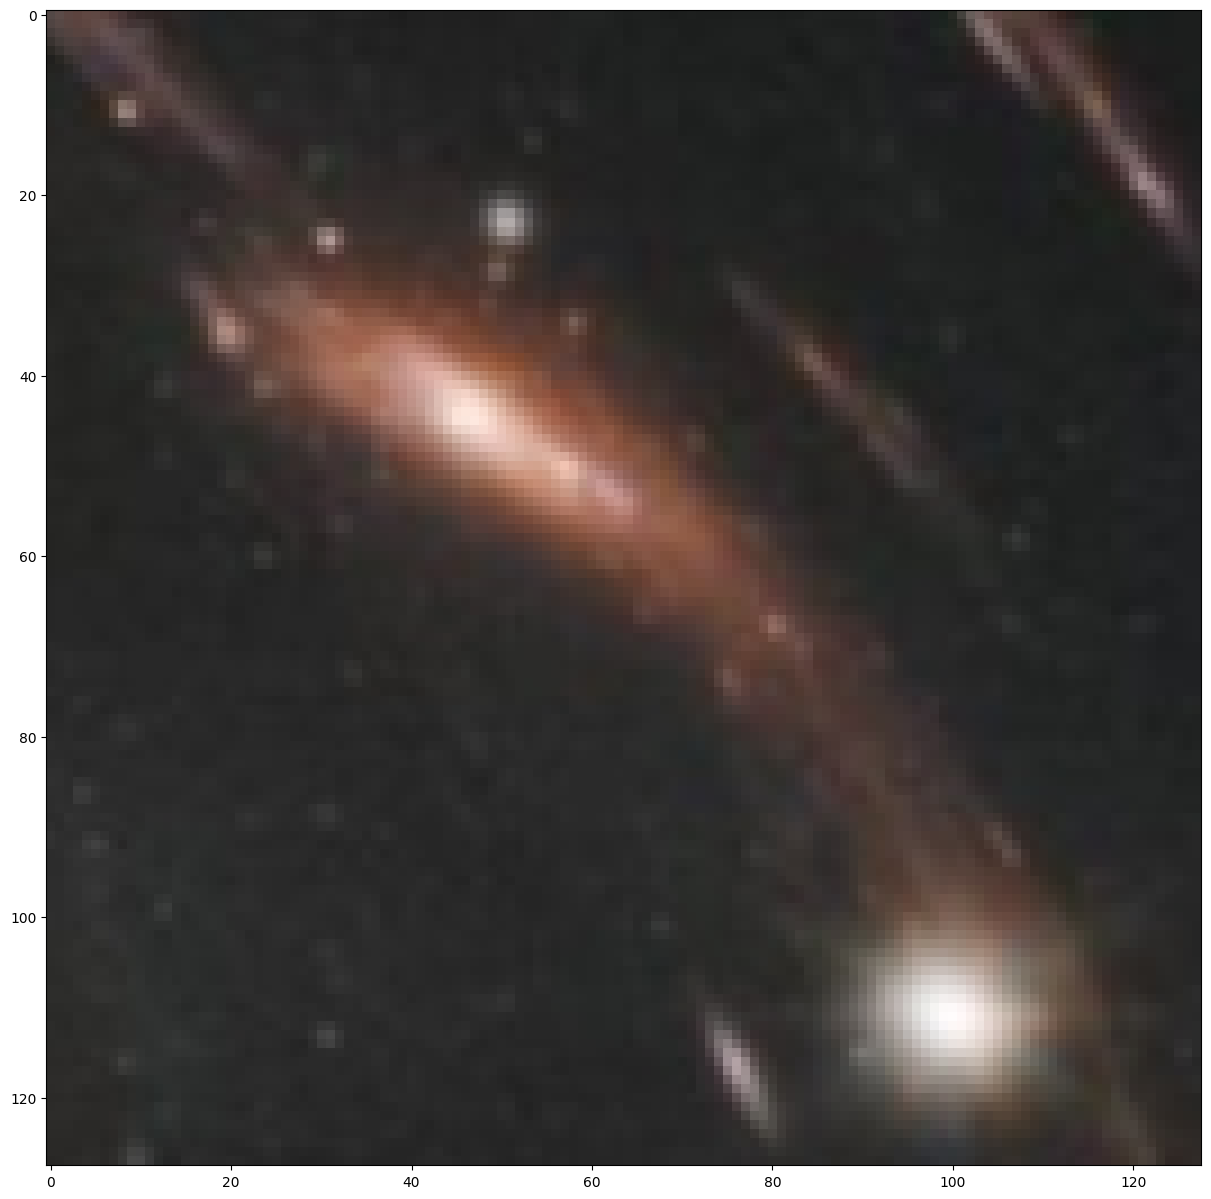

In [56]:
my_image = "lente_si_2.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


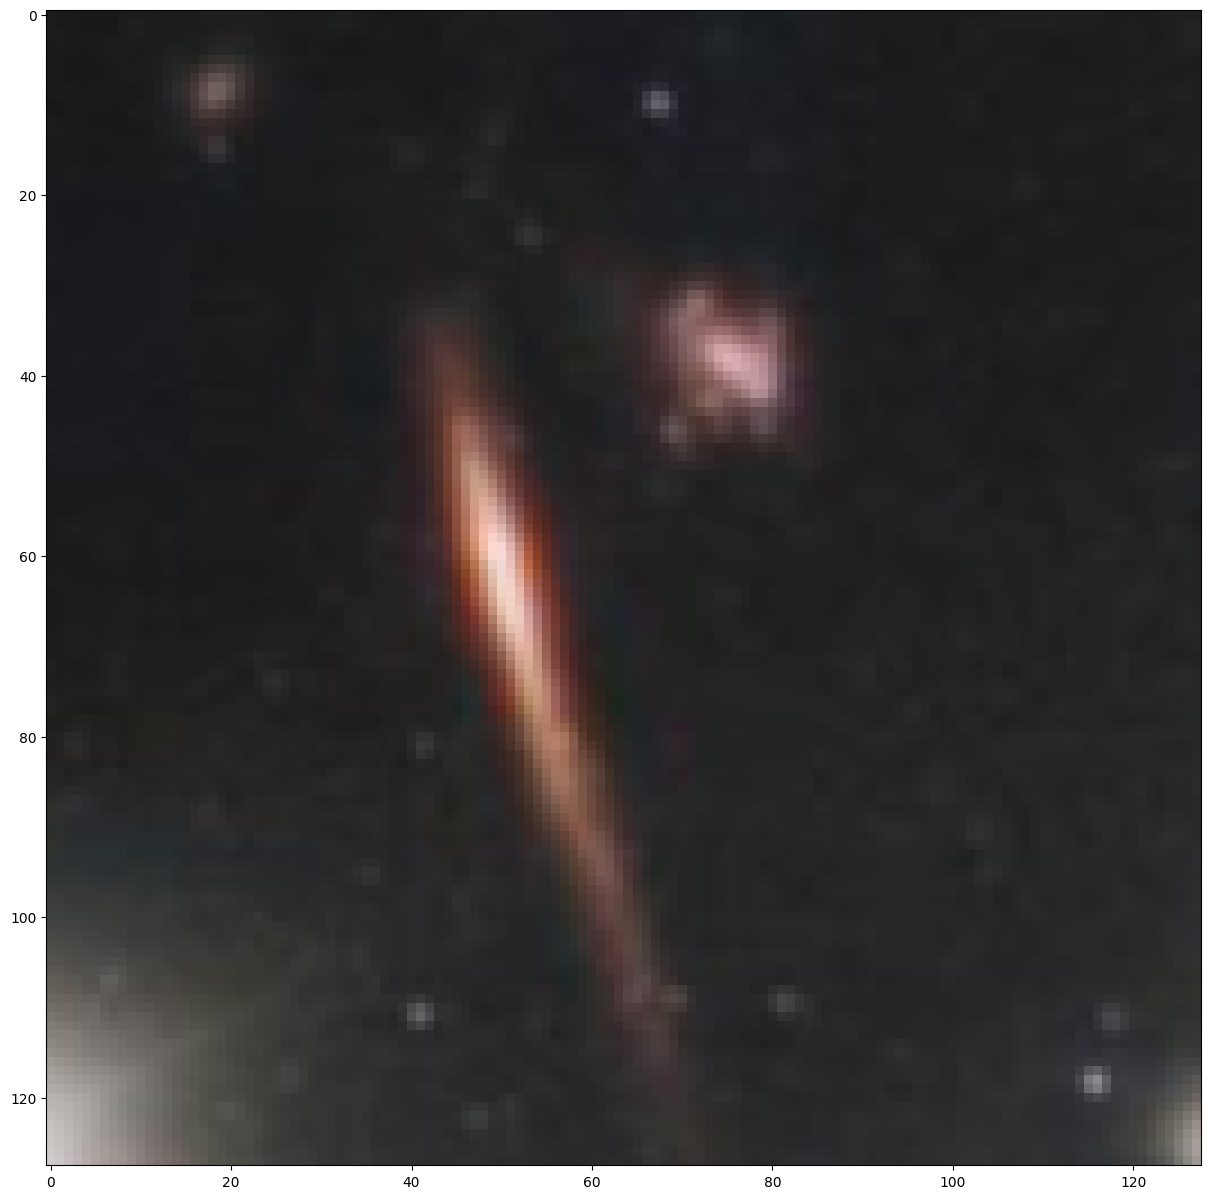

In [57]:
my_image = "lente_si_3.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


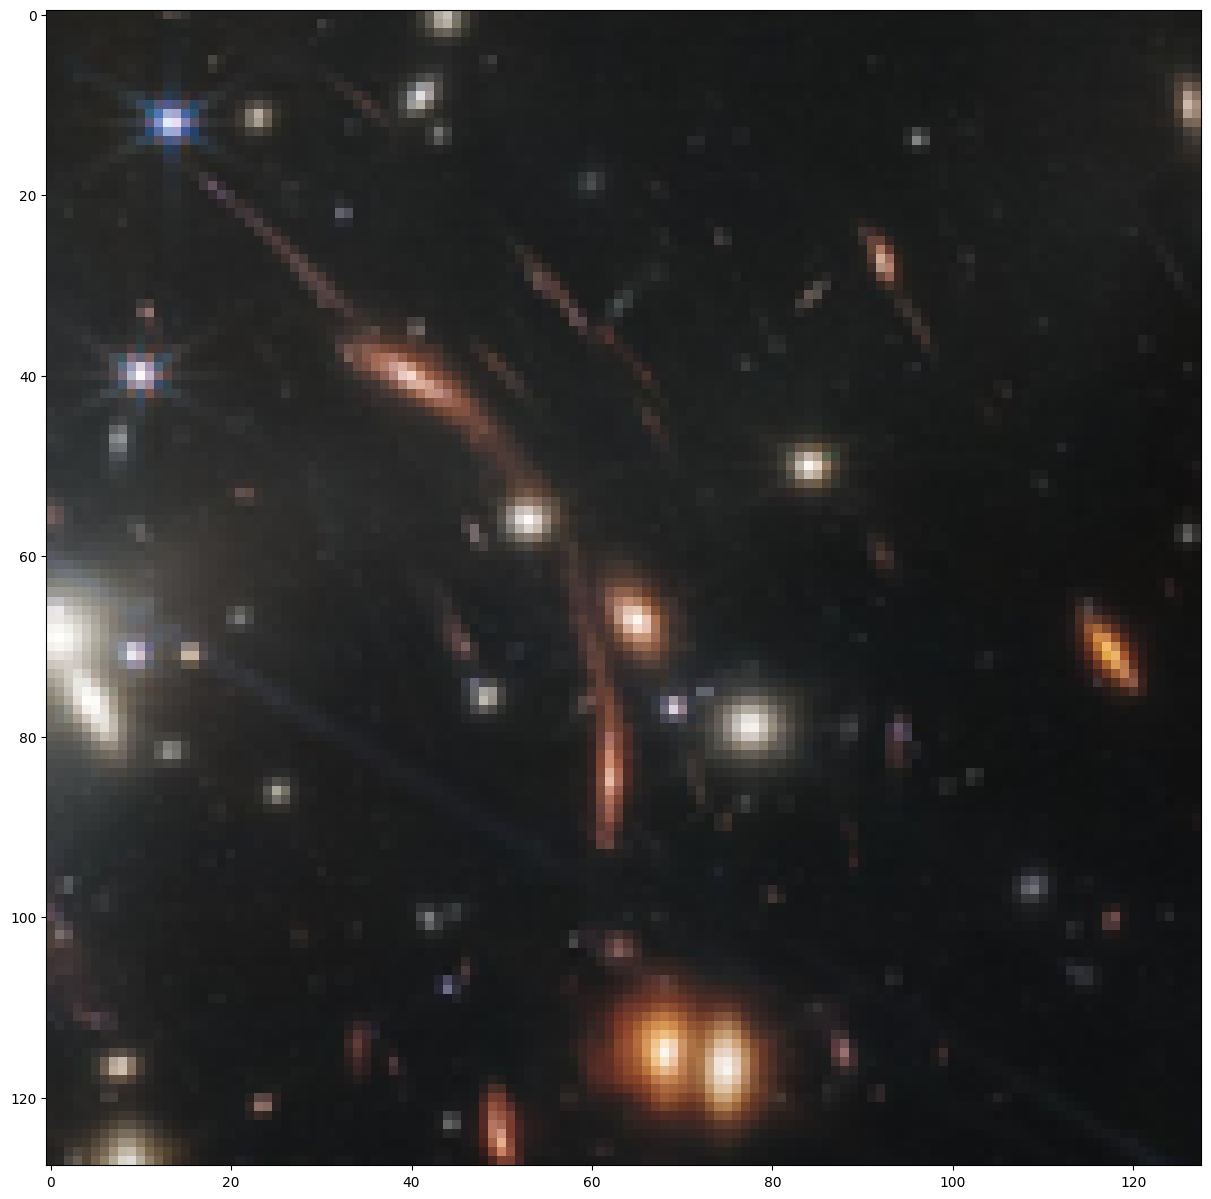

In [58]:
my_image = "lente_si_4.jpg"   
predecir(my_image)

y = 1.0, your algorithm predicts a "LENS" picture.


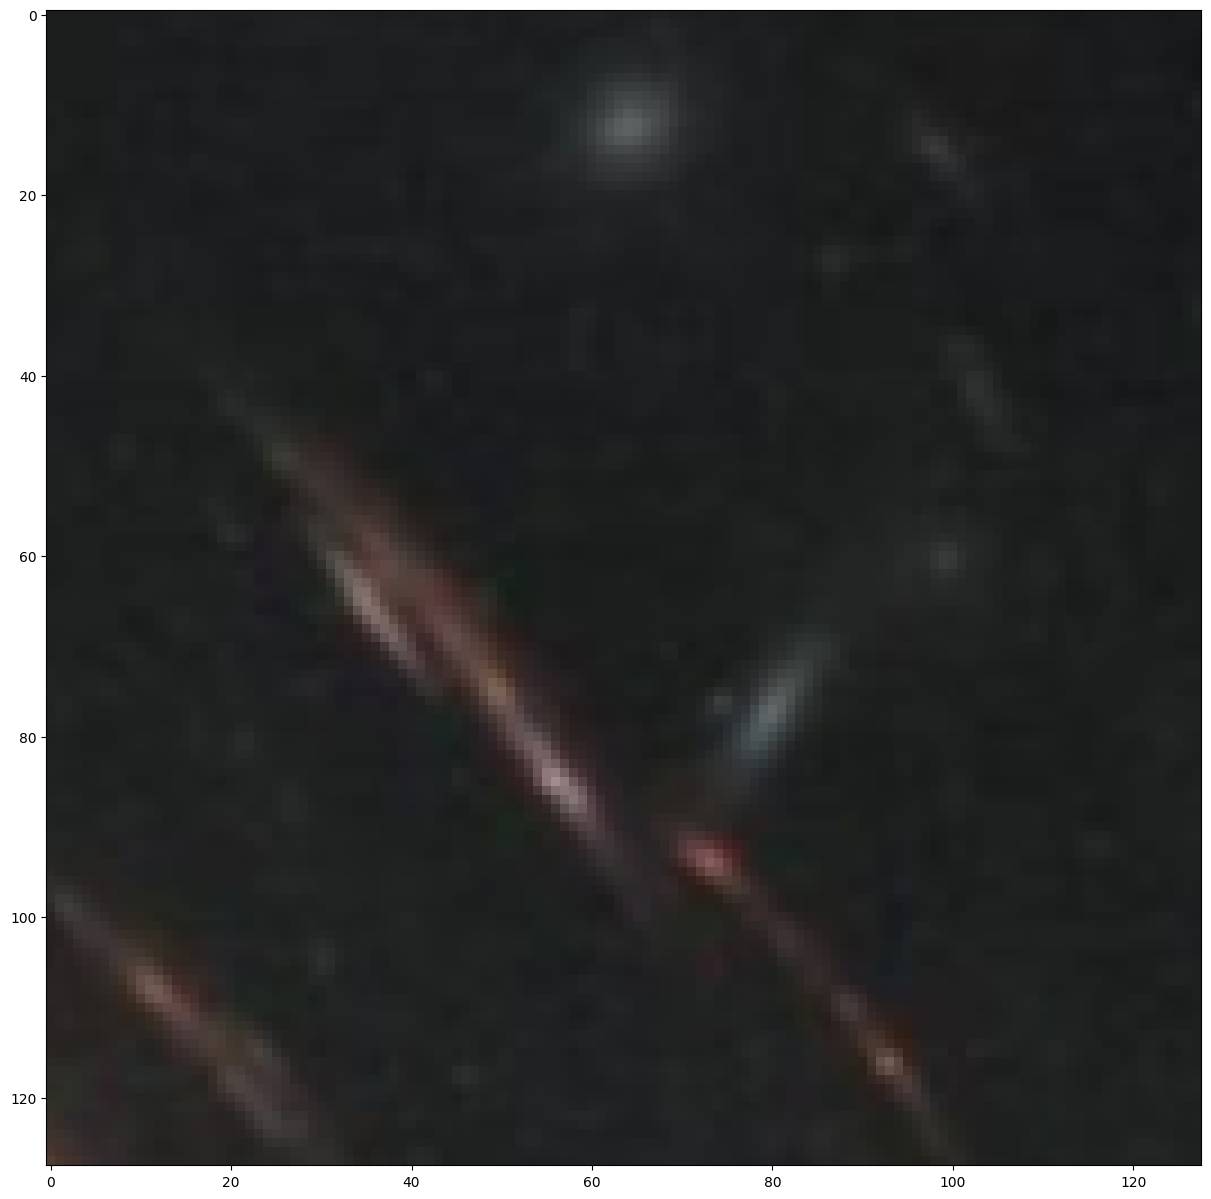

In [59]:
my_image = "lente_si_5.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


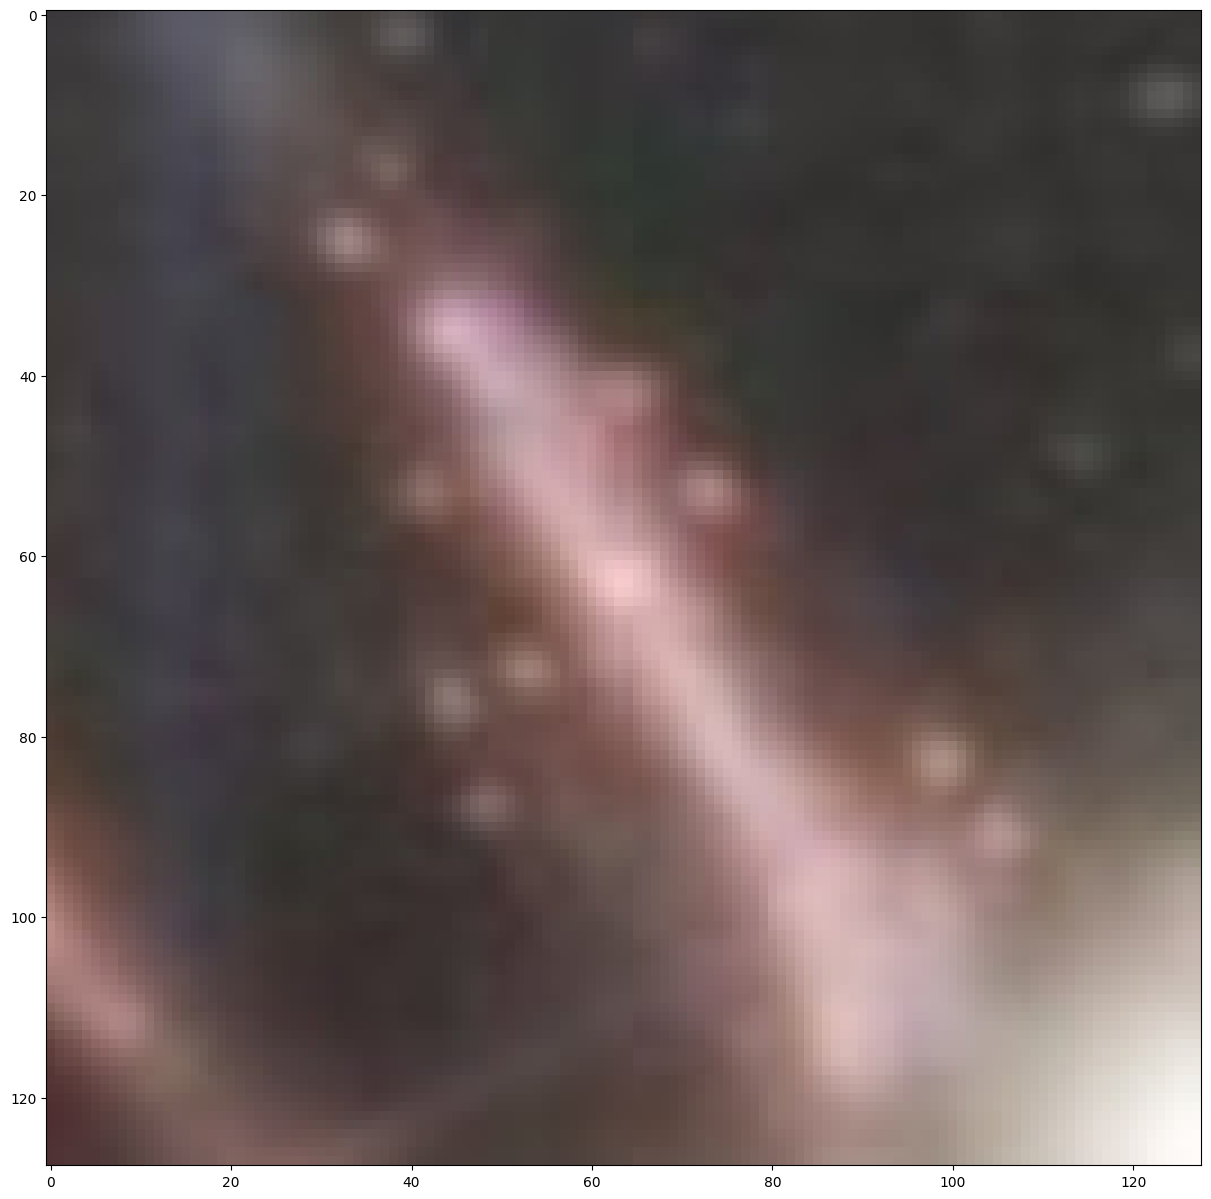

In [60]:
my_image = "lente_si_6.jpg"   
predecir(my_image)

<font color='blue'>
    
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

Finally, if you'd like, we invite you to try different things on this Notebook. Make sure you submit before trying anything. Once you submit, things you can play with include:
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings (center the data, or divide each row by its standard deviation)

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c

In [61]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=8000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.380857
Cost after iteration 200: 0.350673
Cost after iteration 300: 0.330515
Cost after iteration 400: 0.314987
Cost after iteration 500: 0.302346
Cost after iteration 600: 0.291722
Cost after iteration 700: 0.282599
Cost after iteration 800: 0.274640
Cost after iteration 900: 0.267612
Cost after iteration 1000: 0.261344
Cost after iteration 1100: 0.255708
Cost after iteration 1200: 0.250604
Cost after iteration 1300: 0.245954
Cost after iteration 1400: 0.241695
Cost after iteration 1500: 0.237776
Cost after iteration 1600: 0.234155
Cost after iteration 1700: 0.230795
Cost after iteration 1800: 0.227668
Cost after iteration 1900: 0.224748
Cost after iteration 2000: 0.222014
Cost after iteration 2100: 0.219446
Cost after iteration 2200: 0.217030
Cost after iteration 2300: 0.214751
Cost after iteration 2400: 0.212596
Cost after iteration 2500: 0.210555
Cost after iteration 2600: 0.208618
Cost after iteration 2700: 0.206778
Cost